## Hypothesis Testing
1. Defining Null and Alternative Hypothesis
2. Importing Libraries and Data Set
3. Preparing The Data
3. Finding Confidence Interval and P value
4. Clarifying Alternative Hypothesis
5. Testing with Large Data
6. Conclusion

### 1.Defining Null and Alternative Hypothesis

1- Book between 4 and 5 rating are not all series

2- The best 100 books are all below 1000 pages

3- Books are getting shorter through years!

4- The books with the highest review number will also have good ratings!

5- The best 100 books are all series

6- which genres are getting popular? Not Hypothesis material I think 

### 2.Importing Libraries and Data Set

In [29]:
#Importing Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import os
import re
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams #Import rcParams to set font styles

#Set font style and size 
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [30]:
#Importing Data Set
def importing_test_data():
    df=pd.read_csv("/work/Good_reads_Best_2000s/big_books_clean.csv")
    return df
df=importing_test_data()

### 3.Preparing The Data

In [11]:
#Showing first 5 row of data
df.head()

,URL,Title,Author,Number of Ratings,Number of Reviews,Average Ratings,Number of Pages,Published Year,Series,Genres,Awards,Places
0,https://www.goodreads.com/book/show/136251.Har...,Harry Potter and the Deathly Hallows (Harry Po...,J.K. Rowling,2959601.0,68457.0,4.6,759.0,2007.0,1.0,"['Fantasy', 'Young Adult', 'Fiction']",['Locus Award Nominee for Best Young Adult Nov...,"[['London, England', '(United Kingdom)'], ['Ho..."
1,https://www.goodreads.com/book/show/2767052-th...,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,6685627.0,175504.0,4.3,374.0,2008.0,1.0,"['Young Adult', 'Fiction', 'Dystopia']",['Locus Award Nominee for Best Young Adult Boo...,"[['District 12, Panem', 'Capitol, Panem', 'Pan..."
2,https://www.goodreads.com/book/show/1.Harry_Po...,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,2575456.0,42018.0,4.5,652.0,2006.0,1.0,"['Fantasy', 'Young Adult', 'Fiction']",['Locus Award Nominee for Best Young Adult Nov...,[['Hogwarts School of Witchcraft and Wizardry'...
3,https://www.goodreads.com/book/show/6.Harry_Po...,Harry Potter and the Goblet of Fire (Harry Pot...,J.K. Rowling,2750013.0,49585.0,4.5,734.0,2002.0,1.0,"['Fantasy', 'Young Adult', 'Fiction']","['Hugo Award for Best Novel (2001)', ""Mythopoe...","[['Hogwarts School of Witchcraft and Wizardry,..."
4,https://www.goodreads.com/book/show/2.Harry_Po...,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,2653494.0,45376.0,4.5,870.0,2004.0,1.0,"['Fantasy', 'Young Adult', 'Fiction']",['Bram Stoker Award for Works for Young Reader...,[['Hogwarts School of Witchcraft and Wizardry'...


In [47]:
print(df.shape)


(1000, 13)


<bound method DataFrame.info of                                                  Title  \
0    Harry Potter and the Deathly Hallows (Harry Po...   
1              The Hunger Games (The Hunger Games, #1)   
2    Harry Potter and the Half-Blood Prince (Harry ...   
3    Harry Potter and the Goblet of Fire (Harry Pot...   
4    Harry Potter and the Order of the Phoenix (Har...   
..                                                 ...   
995                                           Stitches   
996             Enna Burning (The Books of Bayern, #2)   
997                             Skeletons at the Feast   
998              Song of Susannah (The Dark Tower, #6)   
999  The Total Money Makeover: A Proven Plan for Fi...   

                                                   URL           Author  \
0    https://www.goodreads.com//book/show/136251.Ha...     J.K. Rowling   
1    https://www.goodreads.com//book/show/2767052-t...  Suzanne Collins   
2    https://www.goodreads.com//book/show/1.Ha

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           1000 non-null   object 
 1   URL             1000 non-null   object 
 2   Author          999 non-null    object 
 3   Average_rating  999 non-null    float64
 4   Rating          999 non-null    float64
 5   Reviews         999 non-null    float64
 6   Pages           996 non-null    float64
 7   Year            996 non-null    float64
 8   Series          1000 non-null   int64  
 9   Setting         673 non-null    object 
 10  Awards          999 non-null    object 
 11  Genres          1000 non-null   object 
 12  Awards_no       619 non-null    float64
dtypes: float64(6), int64(1), object(6)
memory usage: 101.7+ KB


In [20]:
pattern = re.compile(r'(\[|\]|\'|\")+')
pattern2 = re.compile(r'(\\n|...more)+')
genres_l = []
genres_freq = {}
for i, j in df['Genres'].items():
    j = re.sub(pattern, '', j).split(',')
    for word in j:
        if word in genres_freq:
            genres_freq[word] += 1
        else:
            genres_freq[word] = 1
    genres_l.append(j)

df['Genres'] = genres_l
print(genre_freq)

TypeError: expected string or bytes-like object

# 2- Testing Hypothesis 

## 1- Book between 4 and 5 rating are not all series

H(1)  : Hypothesis : all books with a rate between 4 and 5 are not part of a series, 

H(0) : Null Hypothesis : Not all books between 4 and 5 rates are part of a series  

p (probability of a book is part of a series  Given that the book have a rate between 4  and 5 ).

In [72]:
df_Hypof = df[['Average_rating', 'Series']]
df_Hypof = df_Hypof.loc[(df_Hypof.Average_rating >= 4)]


In [34]:
print(df_Hypof.Series.mean()) # prints mean blood pressure
print(sm.stats.ztest(df_Hypof.Series, value=0.62)) #print p values

0.6206896551724138
(0.03152680437246157, 0.9748494159681361)


### P value is less than 0.05 so null Hypothesis is true

## 2-  The best 100 books are all below 1000 pages

H(1)  : Hypothesis : All of the best 100 boos are below 1000 pages

H(0) : Null Hypothesis: Some of the best 100 books are 1000 pages or more

In [59]:
df_Hypo1000 = df[:100]
#df_Hypo2 = df_Hypof.loc[(df_Hypo1000.Pages >= 1000)]
p_1000 = df_Hypo1000[df_Hypo1000.Pages >= 1000].shape[0] / df.shape[0]
pages_v = df_Hypo1000["Pages"].value_counts().mean()
print(p_1000)
print(sm.stats.ztest(df_Hypo1000.Pages, value=pages_v)) 

0.004
(nan, nan)


### Probability of a book has 1000 pages or more and be also in the best 100 books in the decade are 0.004 which means null hypothesis is true 

## 3- Books are getting shorter through years!

H(1):  That books are getting shorter each year than the year before  along the 2000's decade

H(0): Books are 

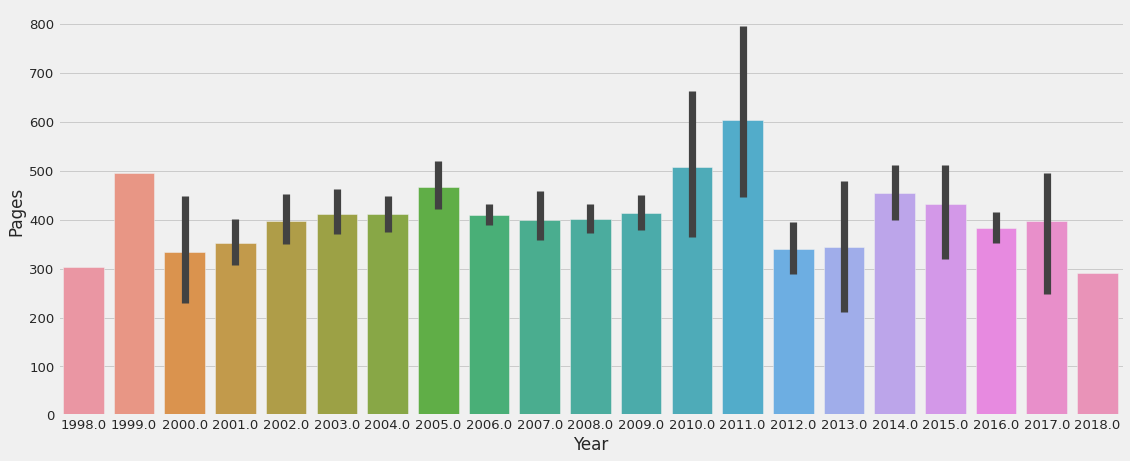

In [71]:
df_years = df[['Year', 'Pages']]
#df.plot(x='Year', y='Pages')
plt.figure(figsize=(17, 7))
sns.set(font_scale= 1.2)
plt.style.use('fivethirtyeight')
sns.color_palette("mako", as_cmap=True)

sns.barplot(x='Year', y='Pages', data=df)
sns.despine()


## 4- The books with the highest review number will also have good ratings!

In this Hypothesis we are checking if there is a positive correlation between 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a0867bd3-5624-476b-af8a-bd1f917bd510' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>